In [1]:
import pandas 

In [2]:
dataset=pandas.read_csv('wines.csv')

In [3]:
dataset.head(2)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
dataset.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [6]:
y = dataset["Wine"]

In [7]:
X = dataset[['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline']]

In [1]:
from sklearn.preprocessing import StandardScalar

ImportError: cannot import name 'StandardScalar' from 'sklearn.preprocessing' (C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [9]:
type(y)

pandas.core.series.Series

In [10]:
y.value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [11]:
y_cat = pandas.get_dummies(y)

In [12]:
y_cat

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [13]:
 in_shape=X.shape[1]

In [14]:
in_shape

13

In [15]:
import seaborn

<AxesSubplot:xlabel='Alcohol', ylabel='Wine'>

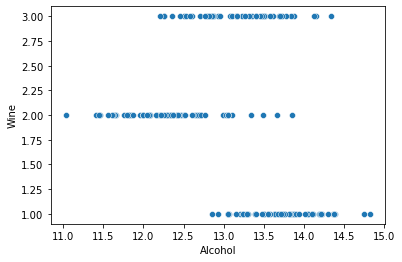

In [16]:
seaborn.scatterplot(x='Alcohol', y='Wine', data= dataset)

In [17]:
from keras.models import Sequential

In [18]:
model = Sequential()

In [19]:
model.get_config()

{'name': 'sequential', 'layers': []}

In [20]:
from keras.layers import Dense

In [21]:
model.add(Dense(
units =6,
input_shape = (in_shape,),
activation = 'relu',
kernel_initializer = 'he_normal'
))
#if we do not mention any initializer here, 
#by default Glorot uniform initializer is used for kernel
#and zeros for bias


In [22]:
#output layer
model.add(Dense(
units =3,
activation = 'softmax'
))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(X, y_cat, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 61.3618 - accuracy: 0.3315
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 52.6835 - accuracy: 0.3202
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 48.2360 - accuracy: 0.2472
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 43.9496 - accuracy: 0.3539
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 40.0208 - accuracy: 0.3596
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 36.2316 - accuracy: 0.2697
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 32.1147 - accuracy: 0.3989
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 28.2784 - accuracy: 0.3764
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 24.2370 - accuracy: 0.4157
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 20.4128 - accuracy: 0.4157
Epoch 11/100
6/6 [=

In [26]:
myloss = model.history.history['loss']

In [27]:
type(myloss)

list

In [28]:
myloss_final = pandas.DataFrame(myloss)

In [29]:
type(myloss_final)

pandas.core.frame.DataFrame

<AxesSubplot:>

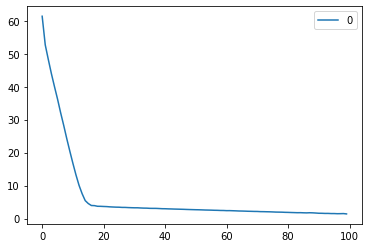

In [30]:
myloss_final.plot()